In [76]:
import numpy as np
import pandas as pd
import radio_snr

from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVR, SVC

import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv('wspr_sample.csv', index_col=0)
print(df.shape)
df = df.sample(frac=0.2)
df.shape

(15241, 15)


(3048, 15)

In [60]:
df = radio_snr.preprocess_data(df)
df.head()

,spot,reporter,snr,frequency,tx_call,power,drift,distance,azimuth,band,version,code,rx_lat,rx_long,tx_lat,tx_long,day,hour
16405727,1105673034,KA4PKB/0,-16,14.097069,KM6ORN,37,0,2673,72,14,1.8.0,0,41.229167,-91.125000,37.770833,-122.125000,17606,21
10538449,1099742015,KU4A,-25,7.040063,VK2RH,37,0,15019,67,7,1.8.0-rc2,0,38.000000,-86.000000,-33.895833,151.208333,17601,9
18469944,1107740530,KR6ZY,-22,10.140165,VA7TZ,30,0,1642,183,10,NaN,0,35.104167,-120.541667,49.854167,-119.541667,17608,21
3486130,1092642182,DL2ZZ,-14,10.140244,IZ4LXP,37,0,868,341,10,NaN,0,51.604167,6.958333,44.270833,10.958333,17594,9
2764877,1091918603,DK8FT/A,-5,7.040201,F4EYW,33,0,758,89,7,NaN,0,48.187500,11.208333,48.000000,0.000000,17593,16


In [61]:
feature_names = ["frequency",
                 "power",
                 "drift",
                 "distance",
                 "azimuth",
                 "band",
                 "rx_lat",
                 "rx_long",
                 "tx_lat",
                 "tx_long",
                 "day",
                 "hour"]
features = df[feature_names]
target = df["snr"]

In [122]:
minc, maxc = 5, 40
c_vals = np.linspace(minc, maxc, 20)
rmse = []
r2 = []
test_r2 = []
for c in c_vals:
    svr = SVR(C=c)
    test_rmse = np.sqrt(-1 * cross_val_score(svr, features, target, scoring='neg_mean_squared_error').mean())
    rmse.append(test_rmse)
    test_r2.append(cross_val_score(svr, features, target, scoring='r2').mean())
    svr.fit(features, target)
    train_r2 = svr.score(features, target)
    r2.append(train_r2)
    print("test rmse: %f train r2: %f" %(test_rmse, train_r2))
errs = pd.DataFrame()
errs["C"] = c_vals
errs["RMSE"] = rmse
errs["r2"] = r2
errs["test r2"] = test_r2
errs.sort_values("RMSE").head()

test rmse: 9.344256 train r2: 0.146156
test rmse: 9.352514 train r2: 0.160816
test rmse: 9.361745 train r2: 0.172402
test rmse: 9.370871 train r2: 0.182206
test rmse: 9.380514 train r2: 0.189785
test rmse: 9.391761 train r2: 0.195919
test rmse: 9.406647 train r2: 0.200861
test rmse: 9.421348 train r2: 0.205008
test rmse: 9.436465 train r2: 0.209040
test rmse: 9.449863 train r2: 0.212703
test rmse: 9.463348 train r2: 0.216004
test rmse: 9.478075 train r2: 0.219191
test rmse: 9.492291 train r2: 0.222425
test rmse: 9.502205 train r2: 0.225451
test rmse: 9.514754 train r2: 0.228153
test rmse: 9.525138 train r2: 0.230841
test rmse: 9.536127 train r2: 0.233435
test rmse: 9.546247 train r2: 0.235930
test rmse: 9.556573 train r2: 0.238269
test rmse: 9.565520 train r2: 0.240388


,C,RMSE,r2,test r2
0,5.000000,9.344256,0.146156,0.044399
1,6.842105,9.352514,0.160816,0.042642
2,8.684211,9.361745,0.172402,0.040745
3,10.526316,9.370871,0.182206,0.038855
4,12.368421,9.380514,0.189785,0.036811


In [62]:
target_classes, bins = pd.qcut(target, 10, labels=[i for i in range(10)], retbins=True)
target_classes.value_counts()

2    426
5    323
0    323
7    312
1    302
8    297
9    290
3    288
6    247
4    240
Name: snr, dtype: int64

In [51]:
svr = SVC(C=40)
print("test accuracy: ", cross_val_score(svr, features, target_classes, scoring='accuracy').mean())
svr.fit(features, target_classes)
print("train accuracy: ", svr.score(features, target_classes))

test accuracy:  0.12729566491018948
train accuracy:  1.0


In [52]:
minc_classification, maxc_classification = 5, 40
c_vals_classification = np.linspace(minc, maxc, 10)
rmse_classifier = []
r2_classifier = []
for c in c_vals_classification:
    svr = SVC(C=c)
    test_rmse = np.sqrt(cross_val_score(svr, features, target_classes, scoring='accuracy').mean())
    rmse_classifier.append(test_rmse)
    svr.fit(features, target)
    train_r2 = svr.score(features, target_classes)
    r2_classifier.append(train_r2)
    print("test rmse: %f train r2: %f" %(test_rmse, train_r2))


test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593
test rmse: 0.356785 train r2: 0.004593


In [53]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {'kernel':["rbf", "sigmoid"], 
          "C": list(np.linspace(0.1, 10, 10)),
          "gamma":list(np.linspace(0.001, 0.5, 10))
         }
gs_svc = SVC()
gs = GridSearchCV(gs_svc, params)
gs.fit(features, target_classes)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1.2000000000000002, 2.3000000000000003, 3.4000000000000004, 4.5, 5.6, 6.7, 7.800000000000001, 8.9, 10.0], 'gamma': [0.001, 0.05644444444444444, 0.11188888888888888, 0.16733333333333333, 0.22277777777777777, 0.2782222222222222, 0.33366666666666667, 0.3891111111111111, 0.44455555555555554, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [65]:
bestsvc = gs.best_estimator_

In [66]:
cross_val_score(bestsvc, features, target_classes, scoring="accuracy").mean()

0.1410777242156663

In [67]:
gs.best_params_

{'C': 1.2000000000000002, 'gamma': 0.11188888888888888, 'kernel': 'rbf'}

In [68]:
from sklearn.decomposition import PCA

In [69]:
features = (features - features.mean())/features.std()
features.describe()

,frequency,power,drift,distance,azimuth,band,rx_lat,rx_long,tx_lat,tx_long,day,hour
count,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03
mean,3.661623e-15,2.402933e-16,-3.855548e-17,-2.697245e-17,6.472659e-17,-6.556435e-19,-1.314387e-14,1.621625e-16,-5.286854e-15,-1.246087e-15,2.320290e-14,-7.095520e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.323947e+00,-4.137969e+00,-5.561611e+00,-8.438938e-01,-1.541989e+00,-1.459767e+00,-7.739629e+00,-2.370383e+00,-6.525596e+00,-2.404583e+00,-1.608915e+00,-1.882221e+00
25%,-4.056861e-01,-9.612181e-01,1.920726e-01,-5.126186e-01,-9.334981e-01,-4.115822e-01,-3.400597e-01,-1.003620e+00,-3.315818e-01,-1.024640e+00,-8.624539e-01,-8.200646e-01
50%,-9.349578e-02,5.619038e-03,1.920726e-01,-2.951737e-01,-1.024997e-01,-6.218726e-02,2.852166e-01,4.884932e-01,2.133948e-01,4.423293e-01,-6.069940e-02,9.035495e-02
75%,4.591155e-01,9.724562e-01,1.920726e-01,9.155725e-02,9.827933e-01,4.619052e-01,5.291584e-01,6.425372e-01,5.470232e-01,5.997343e-01,8.239953e-01,8.490379e-01
max,2.440804e+01,3.182370e+00,5.945756e+00,7.270646e+00,1.727513e+00,2.387137e+01,1.664750e+00,3.619212e+00,1.809074e+00,3.585890e+00,1.708690e+00,1.607721e+00


In [70]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

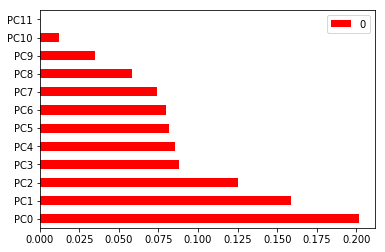

In [77]:
pve = pd.DataFrame(pca.explained_variance_ratio_, index=["PC"+str(i) for i in range(len(pca.explained_variance_ratio_))])
pve.plot.barh(color='red')

In [80]:
pca_feats = pca.fit_transform(features)
pca_feats = pd.DataFrame(pca_feats, columns=["PC"+str(i) for i in range(pca_feats.shape[1])])
pca_feats.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.960190,-1.270836,1.479361,0.588865,0.082704,-1.411924,1.025799,-0.129566,0.232171,0.069845,-0.209046,0.006634
1,4.318921,-1.236890,-5.438284,0.136778,-1.246007,-0.808453,0.377450,-0.922026,-3.447479,-4.527352,1.512608,-0.001058
2,0.906132,-1.657476,1.722819,0.051477,0.840806,-0.544597,0.281088,-0.654554,0.161595,0.769496,0.238152,0.002948
3,0.123532,0.853891,-0.016107,-1.954220,-0.591567,-0.389507,-0.756764,0.795943,0.561457,-0.430987,-0.376089,-0.008776
4,-0.504986,0.881504,0.015482,0.024594,-1.028804,-1.246851,-0.175913,-0.388861,0.420787,0.081840,0.042193,-0.025992


In [98]:
params = {'kernel':["rbf", "sigmoid"], 
          "C": list(np.linspace(0.001, 5, 10)),
          "gamma":list(np.linspace(0.00001, 3, 10))
         }
gs_svc = SVC()
gs = GridSearchCV(gs_svc, params)
gs.fit(pca_feats, target_classes)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'sigmoid'], 'C': [0.001, 0.5564444444444444, 1.1118888888888887, 1.6673333333333331, 2.2227777777777775, 2.778222222222222, 3.3336666666666663, 3.8891111111111107, 4.444555555555556, 5.0], 'gamma': [1e-05, 0.3333422222222222, 0.6666744444444443, 1.0000066666666667, 1.3333388888888889, 1.666671111111111, 2.0000033333333334, 2.3333355555555553, 2.6666677777777776, 3.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
gs.best_params_

{'C': 0.5564444444444444, 'gamma': 0.3333422222222222, 'kernel': 'rbf'}

In [100]:
best_pca = gs.best_estimator_
cross_val_score(best_pca, pca_feats, target_classes).mean()

0.14696840146900225

In [102]:
full = pd.read_csv("wspr_sample.csv", index_col=0)
full.head()

,spot,timestamp,reporter,reporter_grid,snr,frequency,tx_call,tx_grid,power,drift,distance,azimuth,band,version,code
4541493,1093722523,1520245320,DC5AL-R,JO31lk,9,7.040113,G0NJS,IO91vs,37,0,496,91,7,NaN,0
4692526,1093866340,1520259000,KA3JIJ,EM84cj,-27,10.140175,WB0KSL,EM28nu,37,0,1105,113,10,NaN,0
17907988,1107180087,1521372240,PI9ESA,JO22ff,-5,10.140179,IQ6KX,JN63so,20,0,1172,328,10,NaN,0
10270295,1099476317,1520727720,PA0EHG,JO22hb,-17,3.594176,PA7MDJ,JO21is,23,0,33,350,3,NaN,0
29854808,1119235300,1522494360,AG5OV,EL09,-10,7.040137,WA4KFZ,FM18gv,37,0,2236,249,7,1.9.0-rc3,0


In [104]:
feature_names = ["frequency",
                 "power",
                 "drift",
                 "distance",
                 "azimuth",
                 "band",
                 "rx_lat",
                 "rx_long",
                 "tx_lat",
                 "tx_long",
                 "day",
                 "hour"]
features = df[feature_names]
features = (features - features.mean())/features.std()
target = full["snr"]
target_classes, bins = pd.qcut(target, 10, labels=[i for i in range(10)], retbins=True)

In [107]:
pca = PCA()
pca_feats = pca.fit_transform(features)
pca_feats = pd.DataFrame(pca_feats, columns=["PC"+str(i) for i in range(len(features.columns))])

In [108]:
pca_feats.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.960190,-1.270836,1.479361,0.588865,0.082704,-1.411924,1.025799,-0.129566,0.232171,0.069845,-0.209046,0.006634
1,4.318921,-1.236890,-5.438284,0.136778,-1.246007,-0.808453,0.377450,-0.922026,-3.447479,-4.527352,1.512608,-0.001058
2,0.906132,-1.657476,1.722819,0.051477,0.840806,-0.544597,0.281088,-0.654554,0.161595,0.769496,0.238152,0.002948
3,0.123532,0.853891,-0.016107,-1.954220,-0.591567,-0.389507,-0.756764,0.795943,0.561457,-0.430987,-0.376089,-0.008776
4,-0.504986,0.881504,0.015482,0.024594,-1.028804,-1.246851,-0.175913,-0.388861,0.420787,0.081840,0.042193,-0.025992


In [115]:
svc = SVC(C=0.5564444444444444/0.2, gamma=0.3333422222222222)
print("Cross Validation Score: ", cross_val_score(svc, pca_feats, target_classes, cv=10).mean())
svc.fit(pca_feats, target_classes)
print(svc.score(pca_feats, target_classes))

Cross Validation Score:  0.13577720308523097
0.6266404199475065


In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=svc, algorithm="SAMME", n_estimators=500)
print("Cross Validation Score: ", cross_val_score(ada, pca_feats, target_classes, cv=3).mean())
ada.fit(pca_feats, target_classes)
print("Train Score: ", ada.score(pca_feats, target_classes))

Cross Validation Score:  0.13976441218145508
Train Score:  0.13976377952755906


In [121]:
len(ada.estimators_)

500